In [5]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import minmax_scale

import matplotlib.pyplot as plt
import plotnine as p9

import ot
import brainsmash as bs

ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 88 from C header, got 80 from PyObject

In [7]:
sample_expr_L = pd.read_csv("../res/4.SC_exploration/sample_expr_L.tsv", sep="\t", header=0, index_col=0)
sample_info_L = pd.read_csv("../res/4.SC_exploration/sample_info_L.tsv", sep="\t", header=0, index_col=0)
sample_expr_R = pd.read_csv("../res/4.SC_exploration/sample_expr_R.tsv", sep="\t", header=0, index_col=0)
sample_info_R = pd.read_csv("../res/4.SC_exploration/sample_info_R.tsv", sep="\t", header=0, index_col=0)

In [37]:
M_L = metrics.pairwise_distances( sample_info_L[["x", "y", "z"]])
M_R = metrics.pairwise_distances( sample_info_R[["x", "y", "z"]])

In [3]:
def calc_lr_ot(l, r, d, expr, reg=0.2):
    w_l = minmax_scale(np.array(expr.loc[l, :]).mean(axis=0) )
    w_l = w_l / w_l.sum()
    w_r = minmax_scale(np.array(expr.loc[r, :]).mean(axis=0) )
    w_r = w_r / w_r.sum()

    S = np.zeros(shape=(len(w_l), len(w_r)))
    non_zeros_l, non_zeros_r = np.where(w_l>0)[0], np.where(w_r>0)[0]
    gamma = ot.sinkhorn(w_l[non_zeros_l], w_r[non_zeros_r], M[non_zeros_l, :][:, non_zeros_r], reg=reg)
    for i, l in enumerate(non_zeros_l):
        for j, m in enumerate(non_zeros_r):
            S[l, m] = gamma[i, j]
    S /= S.max()
    return S

res = {}
M = M_L/M_L.max()
for line in open("./macaque_lr_database.tsv"):
    s = line.strip().split("\t")
    if s[-1] != "Secreted Signaling":
        continue
    l, r = s[0].strip().split(" - ")
    l = [ i for i in l.strip().split() if i in sample_expr_L.index]
    r = [ i for i in r.strip().strip("()").split("+") if i in sample_expr_L.index]

    if len(l) == 0 or len(r) == 0:
        continue

    S = calc_lr_ot(l, r, M, sample_expr_L, reg=0.2)

    res[s[0]] = {"strength":S.copy(), "annot":s[1:].copy()}



NameError: name 'M_L' is not defined

In [83]:
len(res)

12

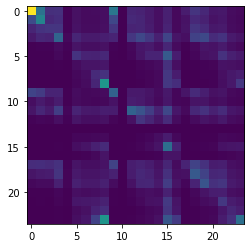

In [78]:


plt.imshow(S)
plt.show()

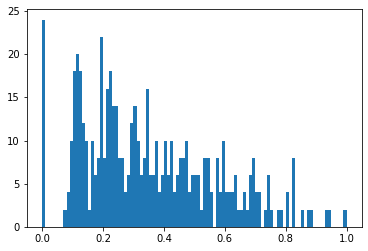

In [40]:
plt.hist( (M_L / M_L.max()).ravel(), bins=100)
plt.show()